<a target="_blank" href="https://colab.research.google.com/github/Jasonchen0317/CSGY-6613-Assignment/blob/main/TakeAtHome/take-at-home.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Problem Set 1 (Take Home) - 40 points

## PS 1.A - 20 points

In [this video](https://www.youtube.com/watch?v=ho6JXE3EbZ8) the author explains how to extract various visualizations of what CNNs learn. [Your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/cnn/cnn-example-architectures/visualizing-what-convnets-learn.html) also covers the topic.

Using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), train a ResNet-50 based CNN on the classification task of $K=9$ classes (filter out the class `ship`) and create the following visualizations for first, middle and last blocks of ResNet-50. You are free to select a class to showcase such visualizations.

* Visualizing intermediate convnet outputs (“intermediate activations”). This is useful to understand how successive convnet layers transform their input.

* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense
from keras import layers
from keras import optimizers
from keras import models

2023-10-22 04:03:29.158783: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-22 04:03:29.604240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 04:03:29.604286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 04:03:29.606266: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 04:03:29.810090: I tensorflow/core/platform/cpu_feature_g

In [2]:
#load cifar10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
#remove ship class(label==8) & change label 9 to 8
index = np.where(y_train.reshape(-1)==8)
x_train, y_train = np.delete(x_train, index, 0), np.delete(y_train, index, 0)
y_train[y_train==9]=8

index = np.where(y_test.reshape(-1)==8)
x_test, y_test = np.delete(x_test, index, 0), np.delete(y_test, index, 0)
y_test[y_test==9]=8

In [4]:
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

0 occurs 5000 times
1 occurs 5000 times
2 occurs 5000 times
3 occurs 5000 times
4 occurs 5000 times
5 occurs 5000 times
6 occurs 5000 times
7 occurs 5000 times
8 occurs 5000 times


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=9)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=9)

In [9]:
input_shape = (32, 32, 3)
n_class = 9
resnet_model = ResNet50(
    input_shape=input_shape,
    weights=None,
    include_top=False
)
flattened = tf.keras.layers.Flatten()(resnet_model.output)
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)
fc2 = tf.keras.layers.Dense(n_class, activation='softmax', name="AddedDense2")(fc1)

model = tf.keras.models.Model(inputs=resnet_model.input, outputs=fc2)

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])



In [97]:
model.get_layer(name='')

178

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
1407/1407 [==============================] - 135s 71ms/step - loss: 1.6911 - accuracy: 0.3773 - val_loss: 1.6327 - val_accuracy: 0.4219
Epoch 2/50
1407/1407 [==============================] - 92s 66ms/step - loss: 1.4518 - accuracy: 0.4707 - val_loss: 1.7269 - val_accuracy: 0.4037
Epoch 3/50
1407/1407 [==============================] - 97s 69ms/step - loss: 1.3837 - accuracy: 0.4917 - val_loss: 1.6270 - val_accuracy: 0.4092
Epoch 4/50
1407/1407 [==============================] - 89s 63ms/step - loss: 1.2914 - accuracy: 0.5319 - val_loss: 1.6823 - val_accuracy: 0.4582
Epoch 5/50
1407/1407 [==============================] - 92s 65ms/step - loss: 1.0668 - accuracy: 0.6206 - val_loss: 1.9209 - val_accuracy: 0.4040
Epoch 6/50
1407/1407 [==============================] - 91s 64ms/step - loss: 0.9579 - accuracy: 0.6629 - val_loss: 1.1025 - val_accuracy: 0.6128
Epoch 7/50
1407/1407 [==============================] - 94s 67ms/step - loss: 0.8589 - accuracy: 0.7029 - val_loss: 1.3348 

KeyboardInterrupt: ignored

In [18]:
img_path = '0872.jpg'

# We preprocess the image into a 4D tensor
#from keras.preprocessing import image
import numpy as np

img = tf.keras.utils.load_img(img_path, target_size=(32, 32))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 32, 32, 3)


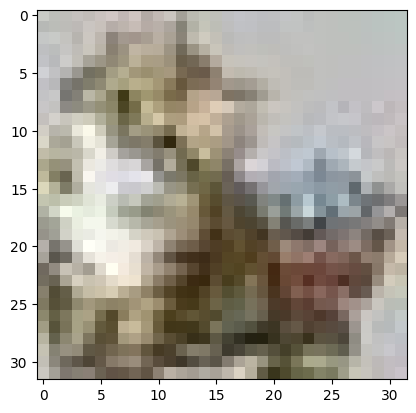

In [19]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [73]:
def get_layer_names(start, end):
  layer_names=[]
  for layer in model.layers[start:end]:
    layer_names.append(layer.name+'('+layer.__class__.__name__+')')
  return layer_names

In [124]:
#Function for plotting feature maps
def plot_feature_map(layer_names, activations):
  images_per_row = 16
  for layer_name, layer_activation in zip(layer_names, activations):
    if 'Conv2D' not in layer_name:
      continue
    columns = 8
    rows = 8
    fig=plt.figure(figsize=(12, 12), )
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(layer_activation[0, :, :, i-1], cmap='gray')
        #pos += 1
    fig.suptitle(layer_name)
    plt.show()

In [115]:
# Extracts the outputs of first block:
layer_outputs = [layer.output for layer in model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [116]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 80ms/step


In [125]:
#Plot feature map for the first block
layer_names = get_layer_names(0, 6)

# Now let's display our feature maps
plot_feature_map(layer_names, activations)

NameError: ignored

In [106]:
# Extracts the outputs of Block 3
layer_outputs = [layer.output for layer in model.layers[38:78]]
# Creates a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 646ms/step


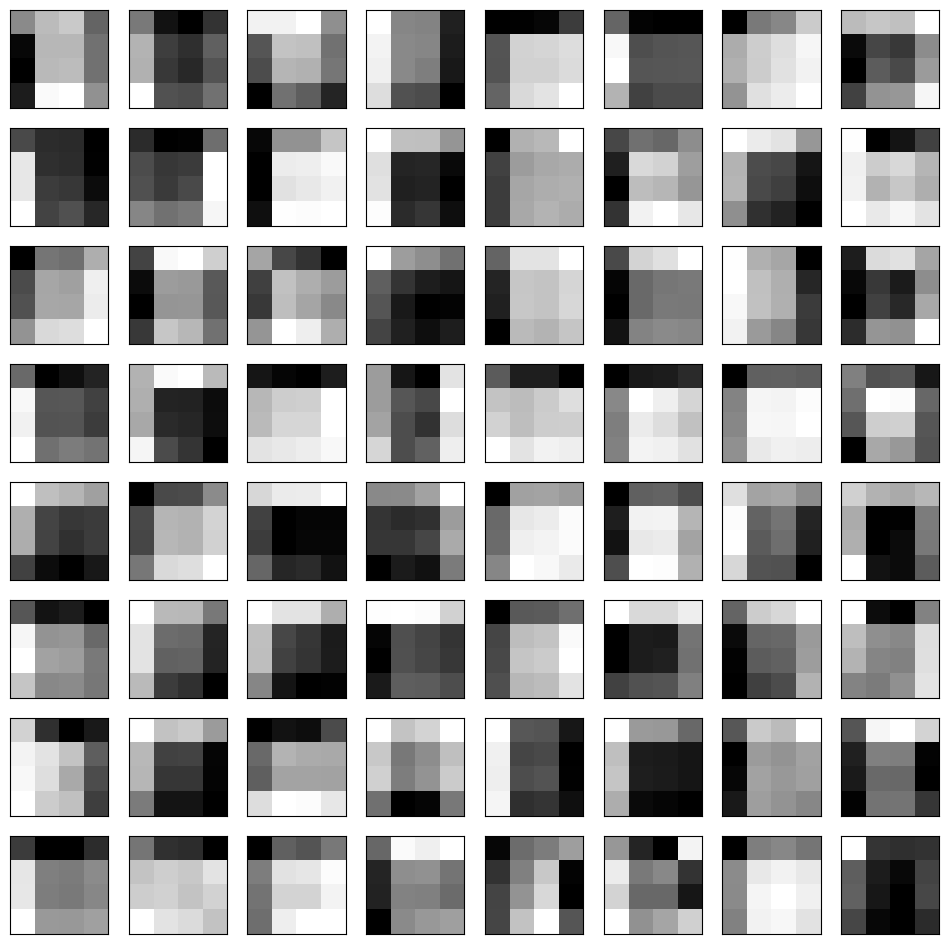

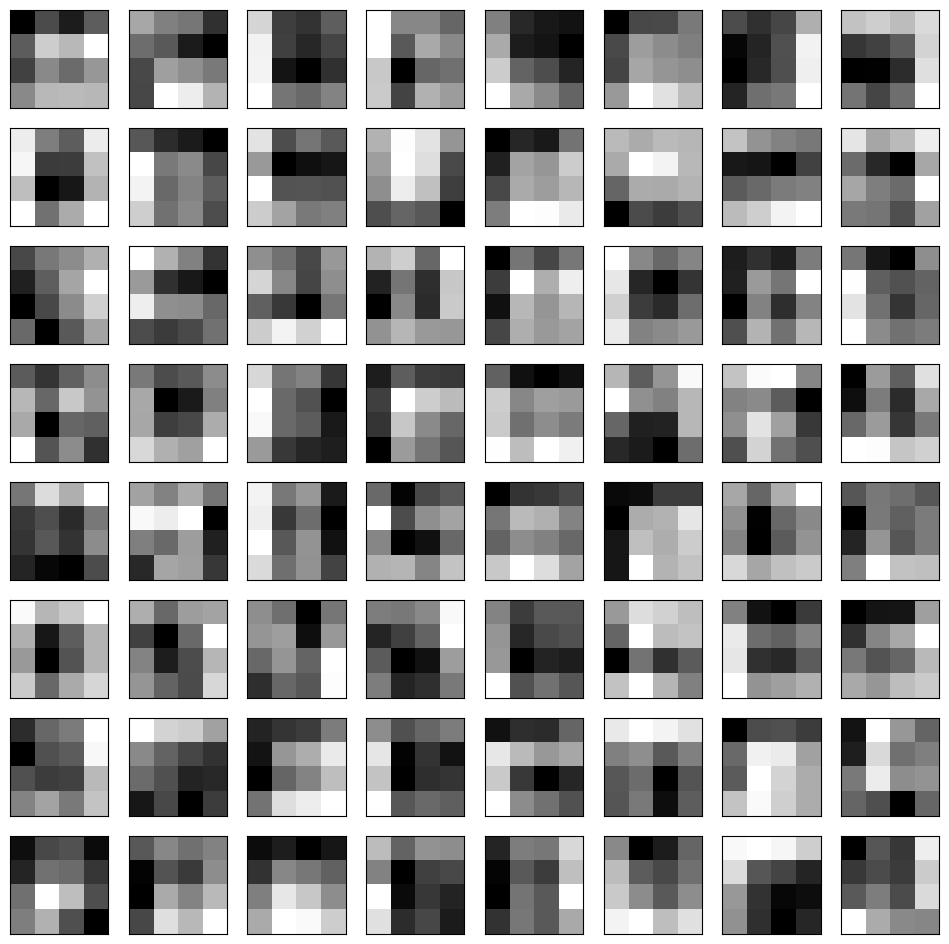

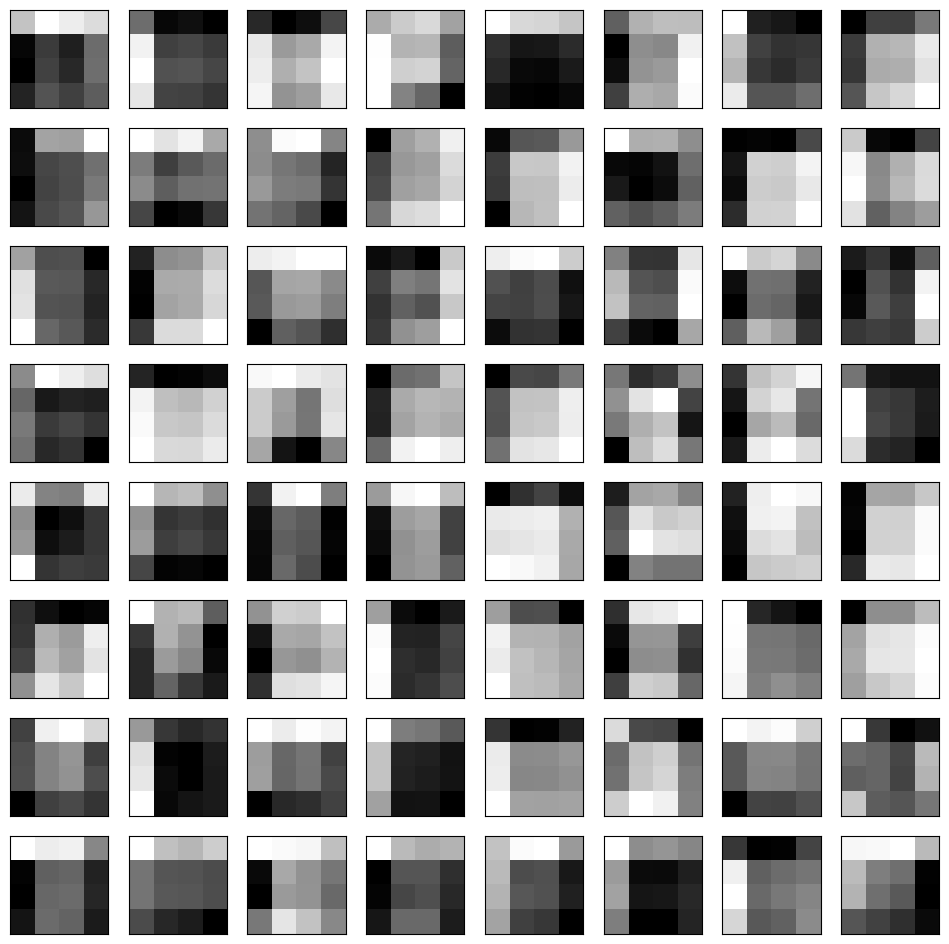

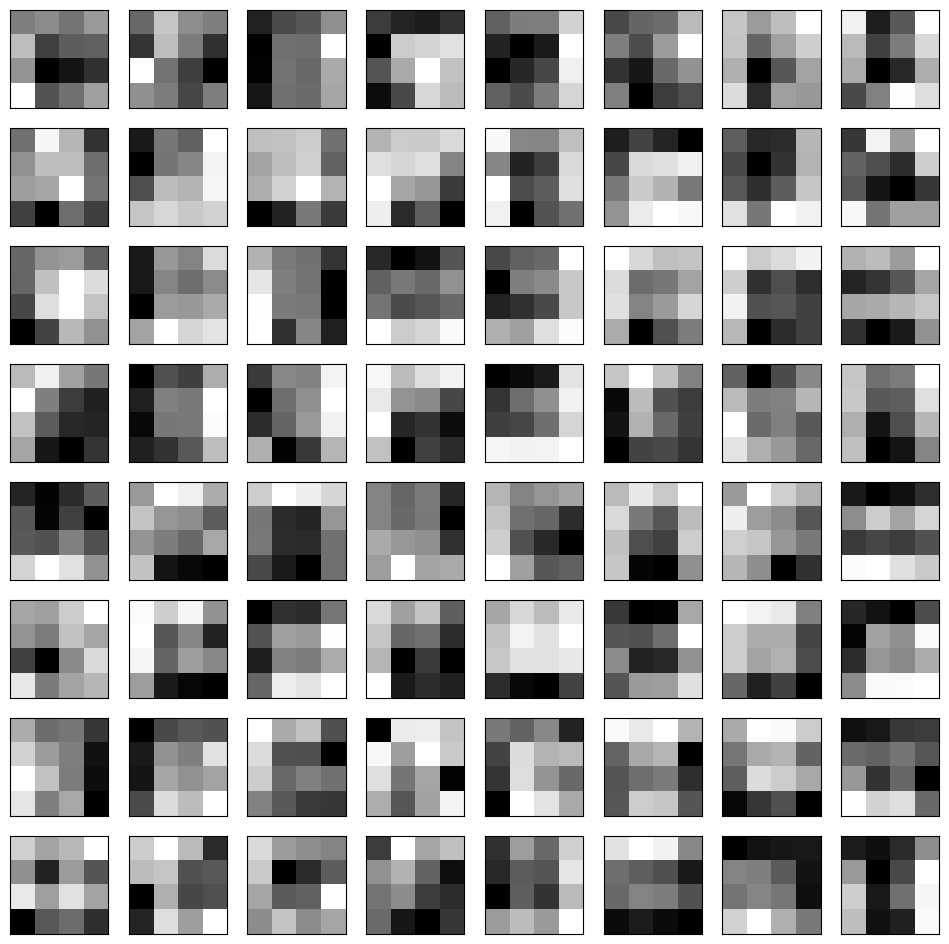

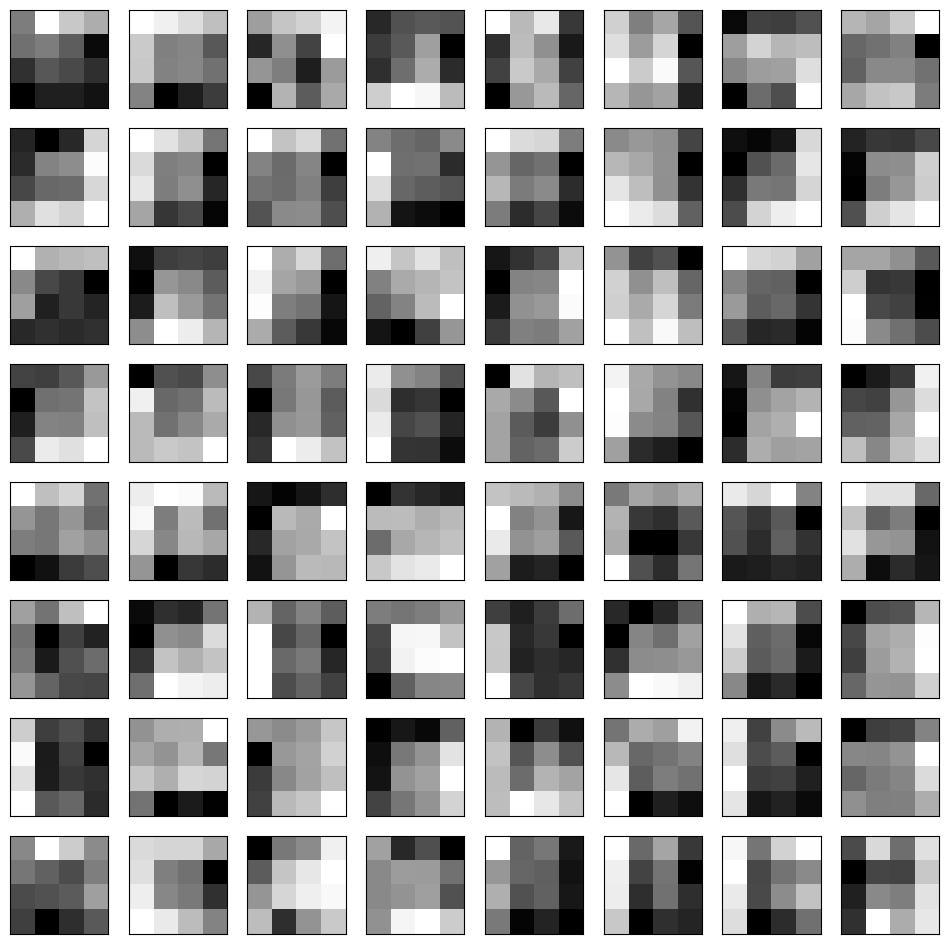

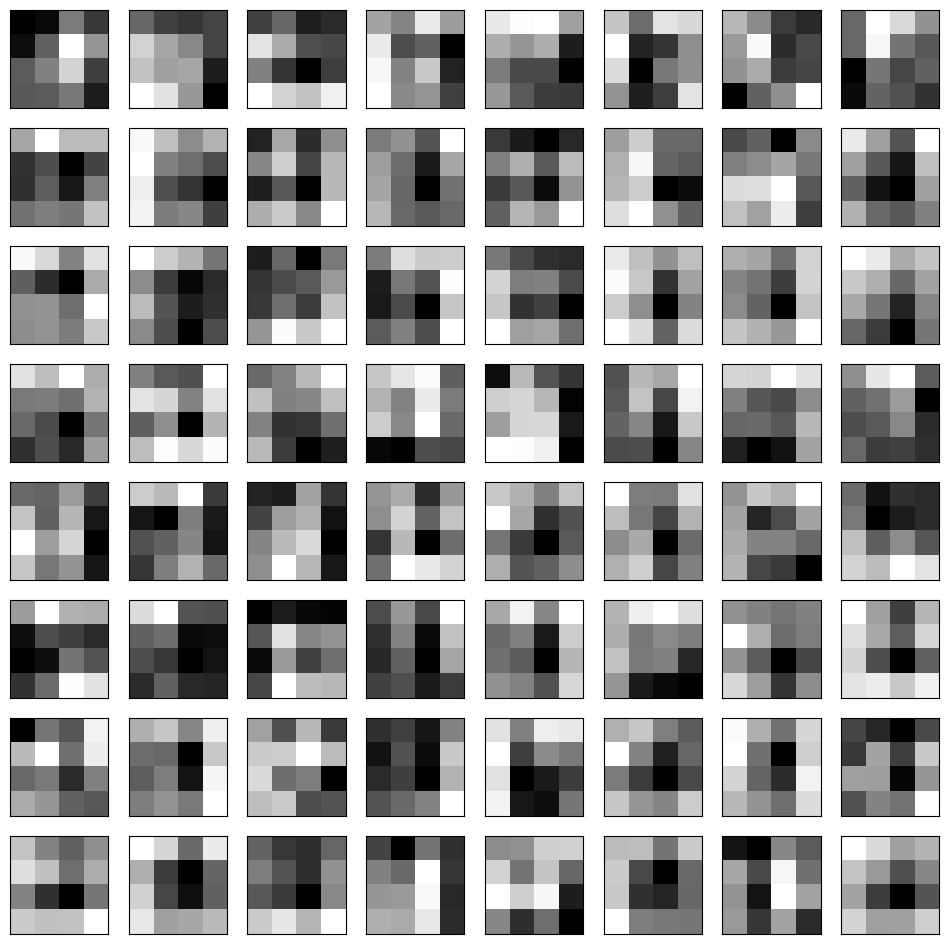

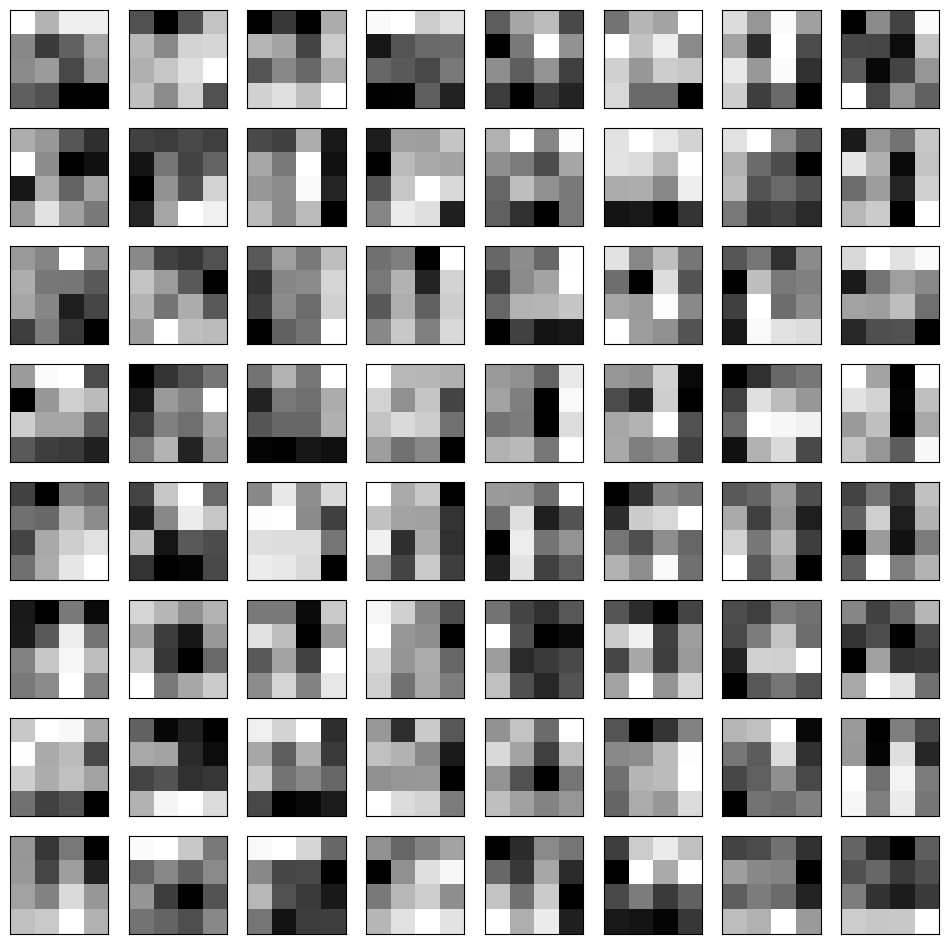

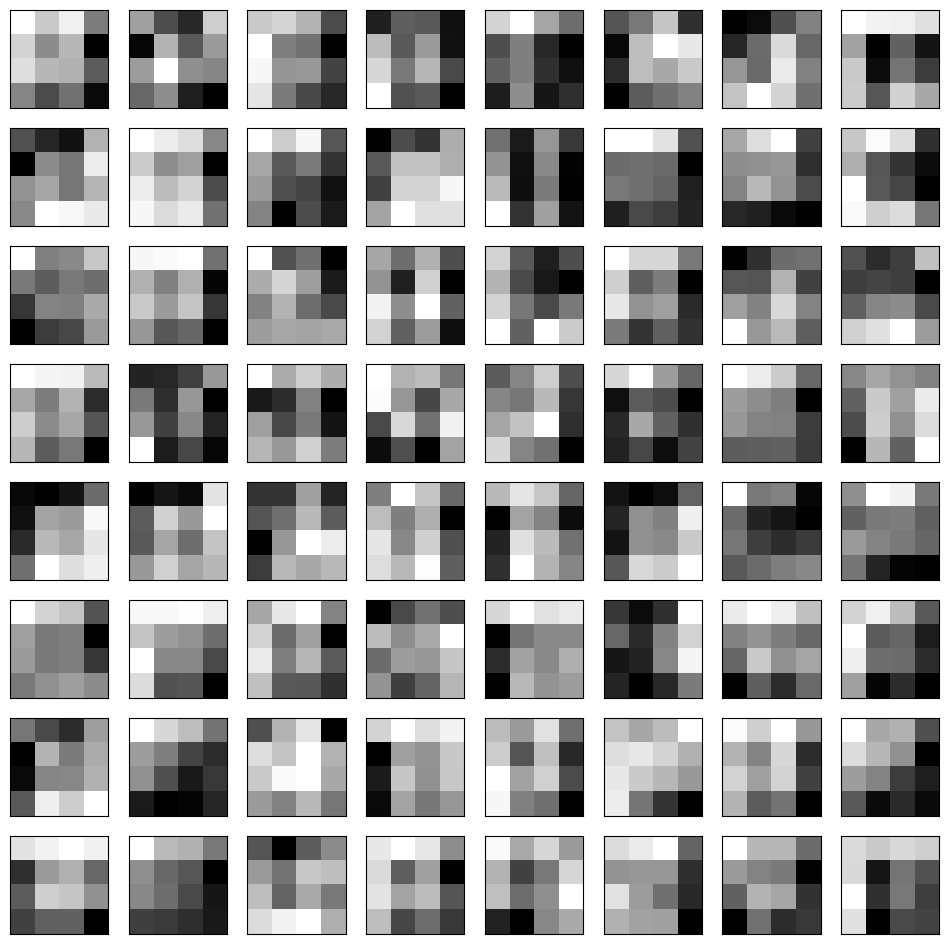

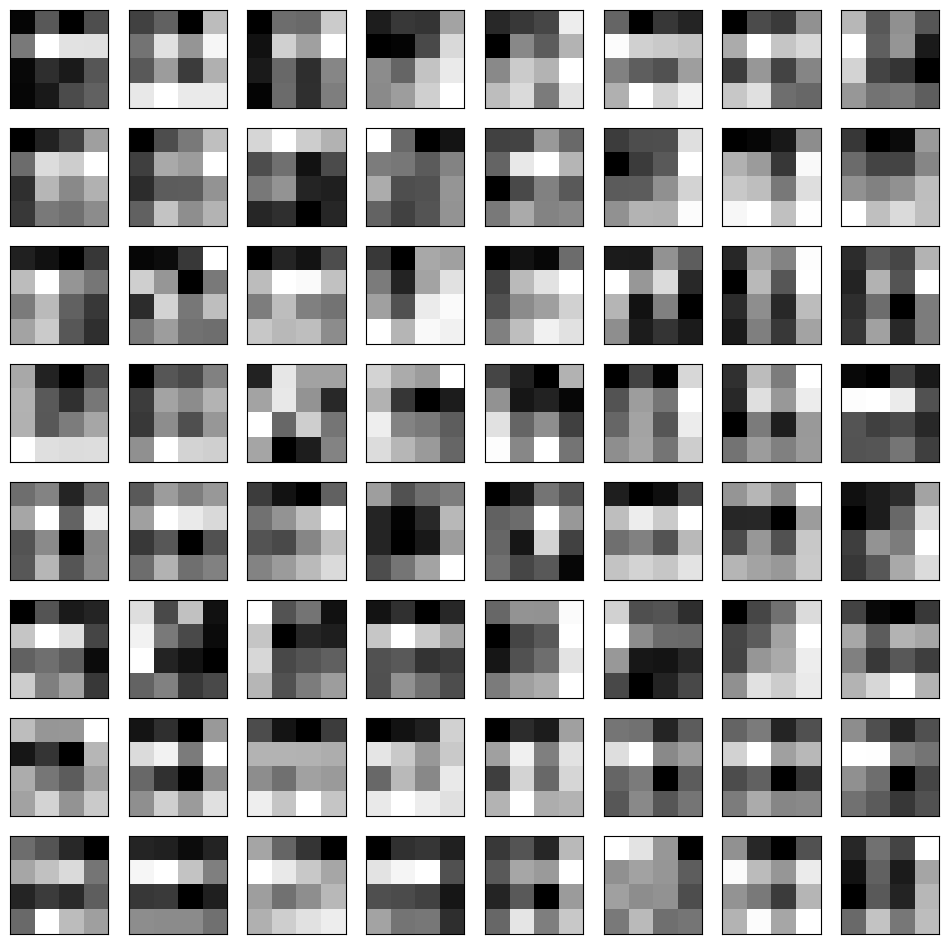

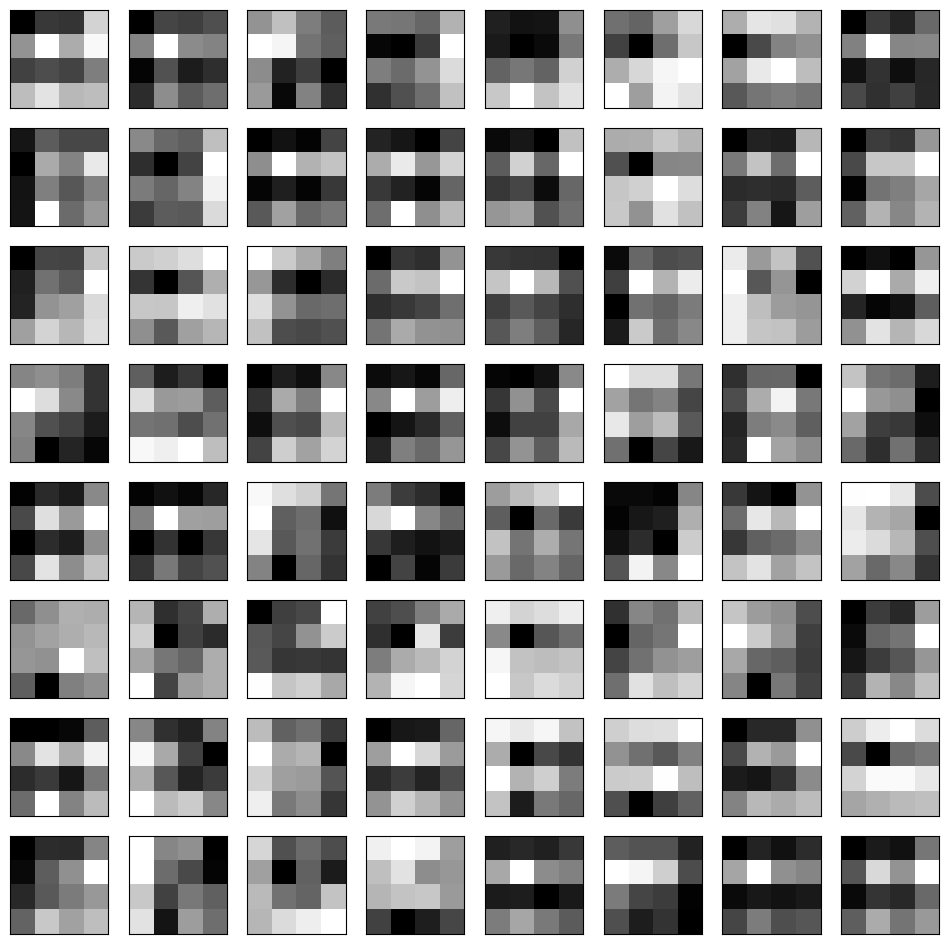

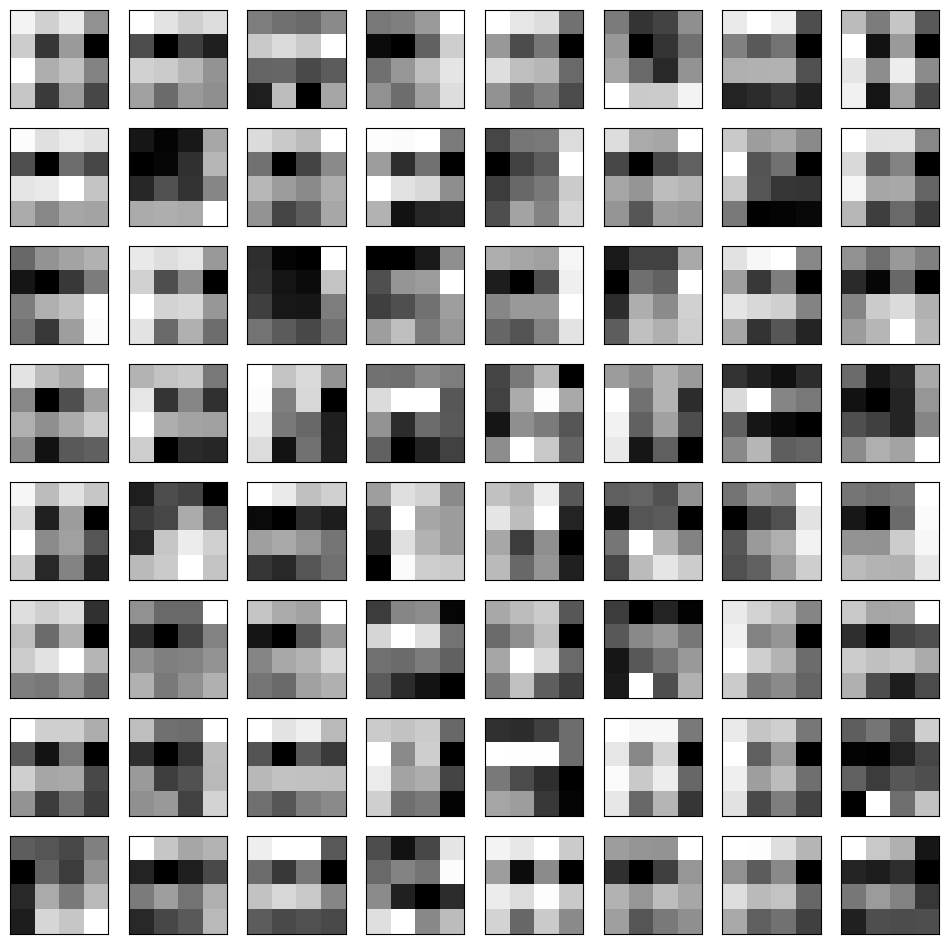

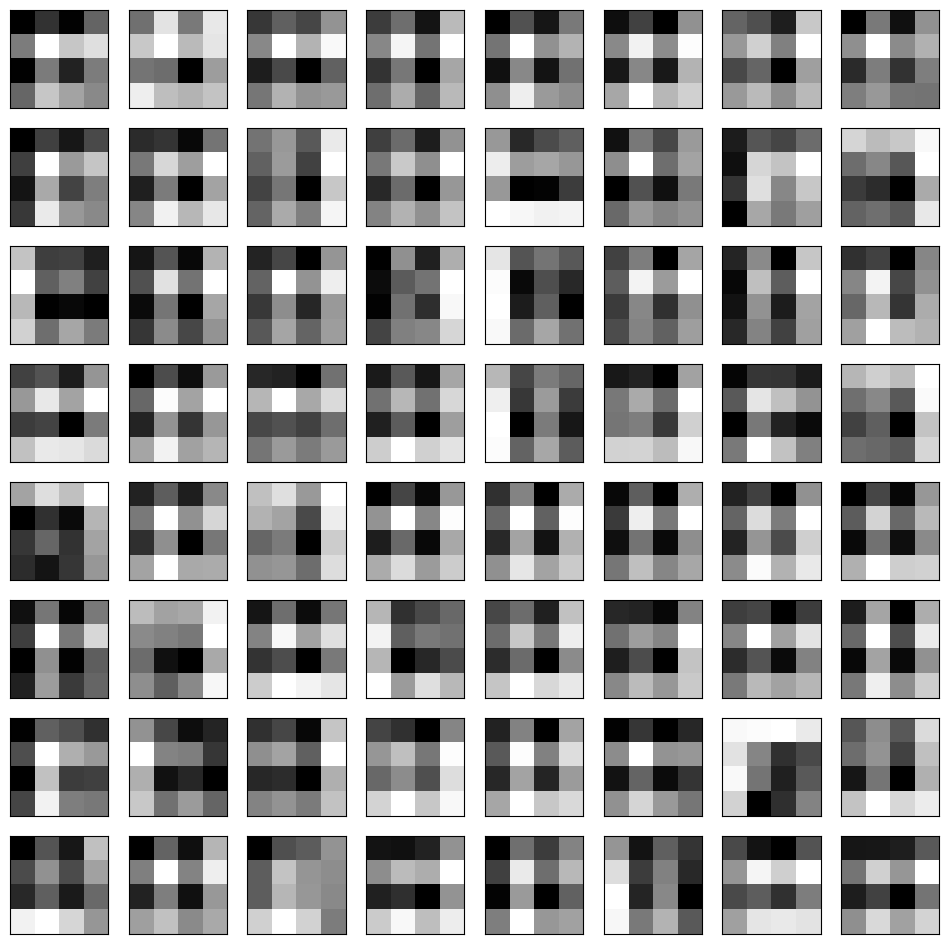

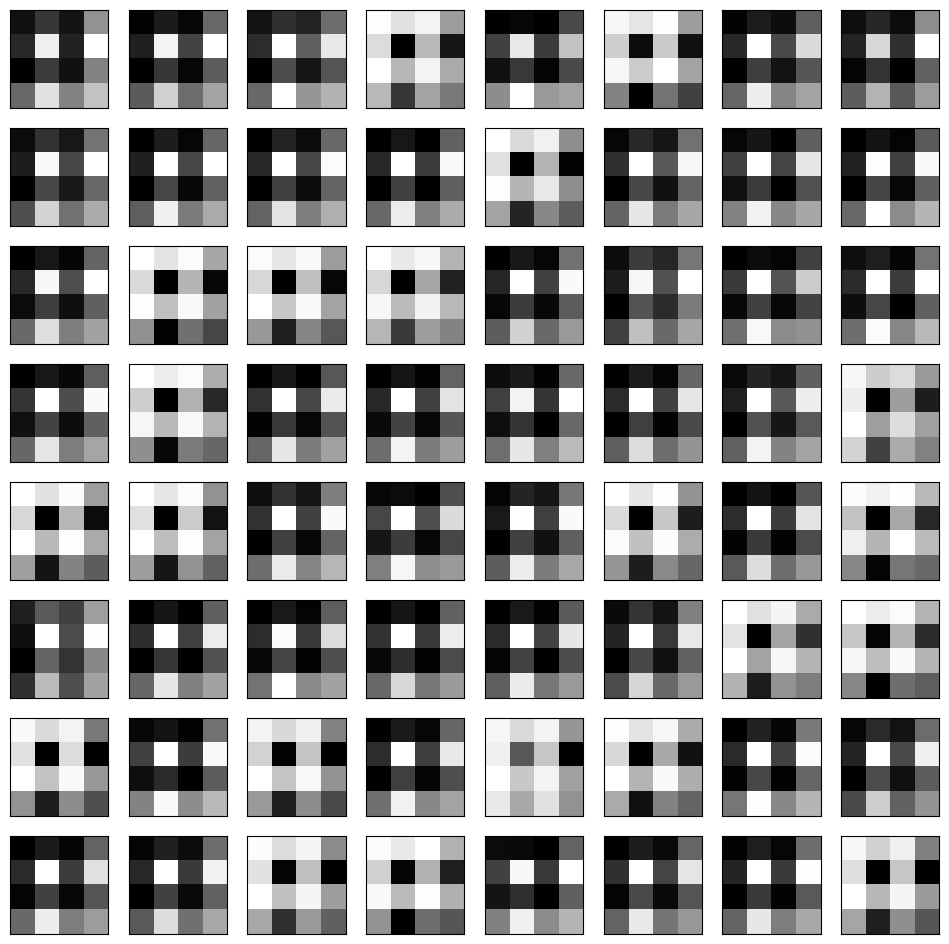

In [107]:
layer_names = get_layer_names(38, 78)

# Now let's display our feature maps

plot_feature_map(layer_names, activations)

In [122]:
# Extracts the outputs of Block 5
layer_outputs = [layer.output for layer in model.layers[141:172]]
# Creates a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 1s/step


AttributeError: ignored

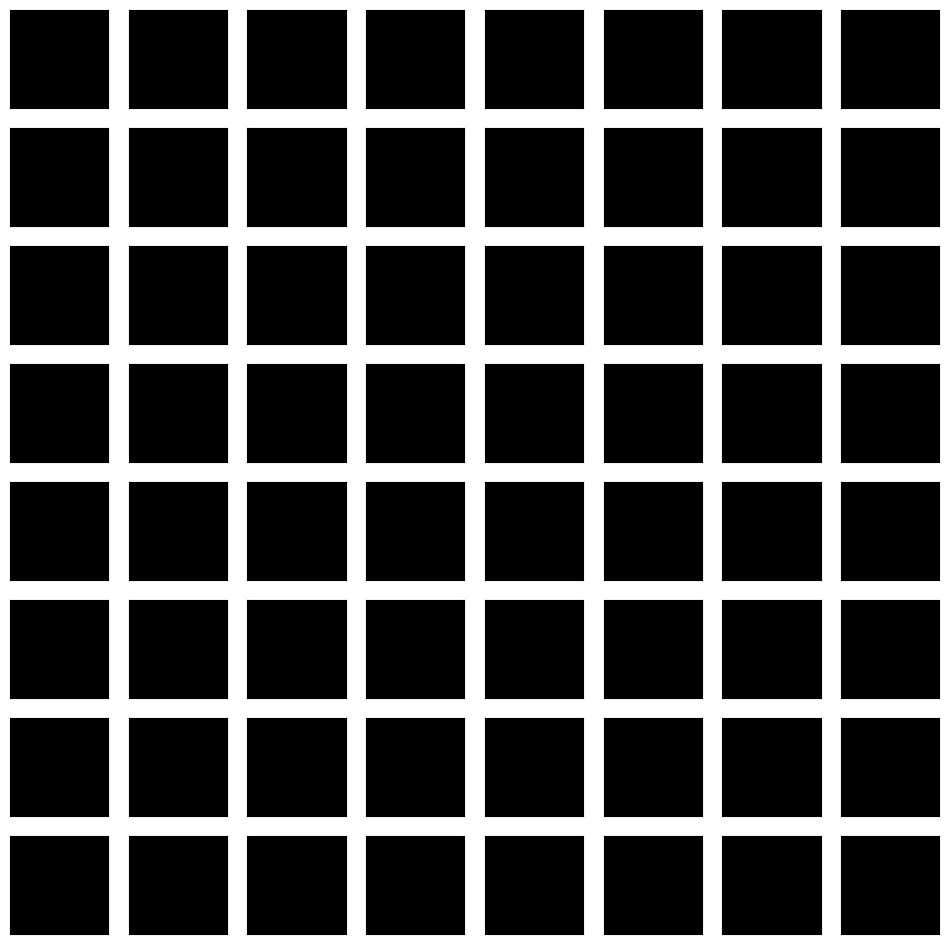

In [123]:
layer_names = get_layer_names(141, 172)

# Now let's display our feature maps

plot_feature_map(layer_names, activations)

In [16]:
layer = model.layers
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

conv1_conv (7, 7, 3, 64)


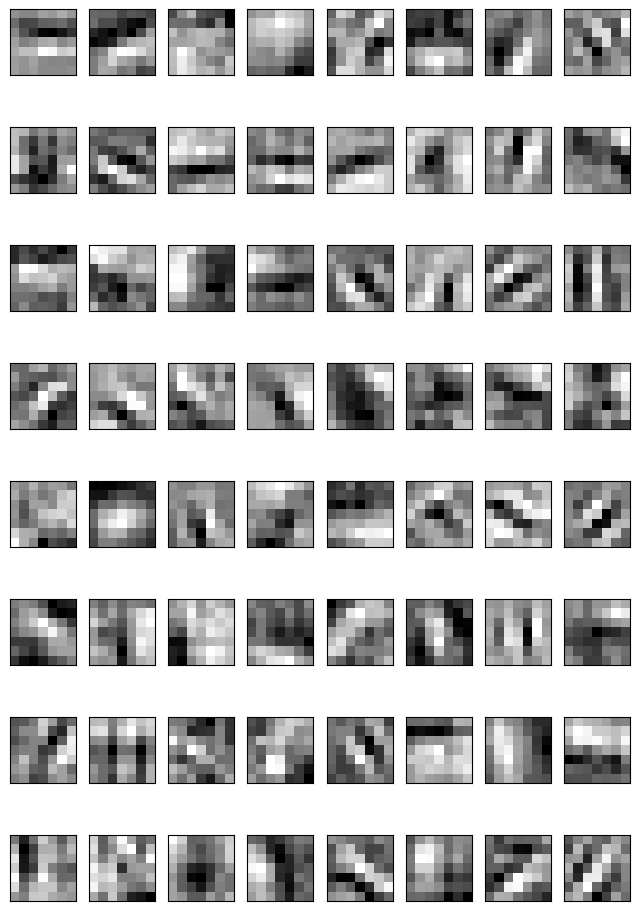

In [17]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

In [ ]:
model.save("model.keras")

## PS 1.B - 20 points

In [this notebook](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/transfer-learning/transfer_learning_tutorial.html) we showcase _transfer learning_ using a pre-trained CNN model.

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as in PS-1A, for the class `ship`.

Repeat the visualization of PS-1.A before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [ ]:
# Insert your code here